## SPA611: Radio Astronomy 
## Programming Assignment 2
### Namer: Mitin 
### Roll No: 251310604
**Objective:** Statistical properties of Gaussian noise and power measurement


We begin by generating a random voltage time series using a normal distribution:

$ V \sim \mathcal{N}(0, \sigma^2) $

This represents thermal noise in a radio receiver.

Mean of noise: 0.001174056579116261
Std of noise: 0.9993407781910747


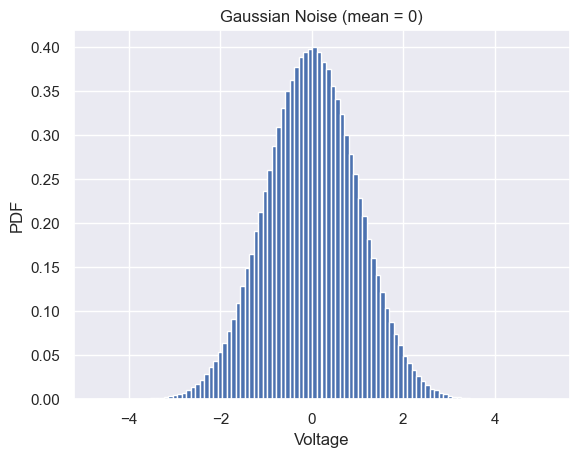

In [3]:
# generating random noise following a gaussian distribution with a mean 0
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

N = 1000000
noise = np.random.normal(loc=0, scale=1, size=N)

print("Mean of noise:", np.mean(noise))
print("Std of noise:", np.std(noise))

plt.figure()
plt.hist(noise, bins=100, density=True)
plt.title("Gaussian Noise (mean = 0)")
plt.xlabel("Voltage")
plt.ylabel("PDF")
plt.show()

### Inference
- Mean is approximately zero.
- Distribution is Gaussian.
- This simulates receiver noise.

### 1) Verify that the mean of power is centered around the variance of the voltage.
Power is:
$
P \sim V^2
$
For zero mean noise:
$
\langle P \rangle = \langle V^2 \rangle = \sigma^2
$

In [4]:
voltage = noise
power = voltage**2

mean_power = np.mean(power)
variance_voltage = np.var(voltage)

print("Mean Power:", mean_power)
print("Variance of Voltage:", variance_voltage)


Mean Power: 0.9986833693643937
Variance of Voltage: 0.9986819909555428


### Inference
- Mean power ≈ variance of voltage.
- Confirms radiometer theory.

### 2. Histograms for Different RMS
RFor Larger RMS → wider distribution.

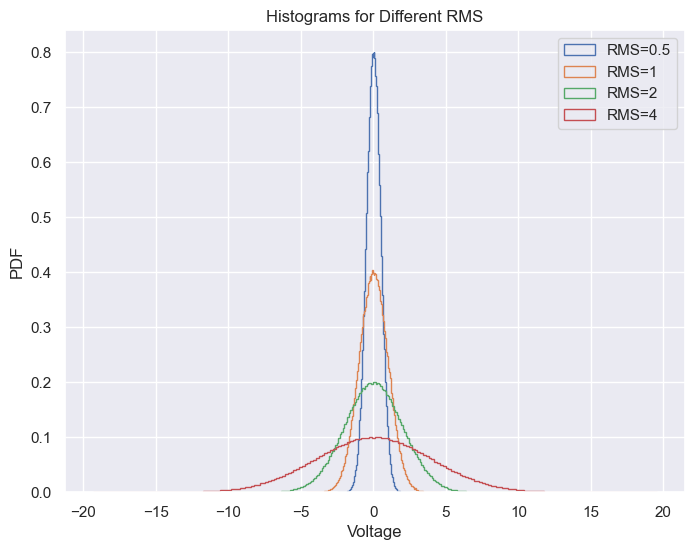

In [5]:
rms_values = [0.5, 1, 2, 4]

plt.figure(figsize=(8,6))
for rms in rms_values:
    data = np.random.normal(0, rms, N)
    plt.hist(data, bins=200, density=True, histtype='step', label=f"RMS={rms}")

plt.legend()
plt.title("Histograms for Different RMS")
plt.xlabel("Voltage")
plt.ylabel("PDF")
plt.show()


### Inference
- Increasing RMS broadens the curve.
- Peak height decreases.
- Area remains unity (normalised PDF).

### 3. Effect of Adding a Slowly Varying Sine Wave
Signal:
$
S(t) = V(t) + A\sin(\omega t).
$

This mimics gain fluctuation / sky signal variation.

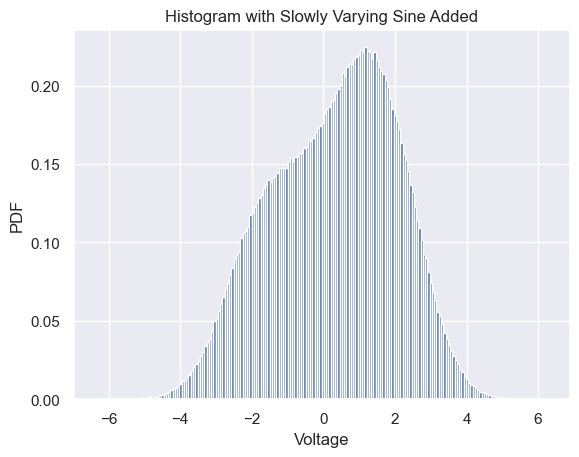

In [6]:
t = np.linspace(0, 10, N)
sine = 2*np.sin(0.5 * t)
signal = noise + sine

plt.figure()
plt.hist(signal, bins=200, density=True)
plt.title("Histogram with Slowly Varying Sine Added")
plt.xlabel("Voltage")
plt.ylabel("PDF")
plt.show()

### Inference
- Histogram becomes broader.
- Deviates from perfect Gaussian.
- It is a convolution of sine distribution and noise.

### 4. Distribution of Variances of Ensembles
Each ensemble gives a different variance estimate.
These follow a scaled chi-square distribution.


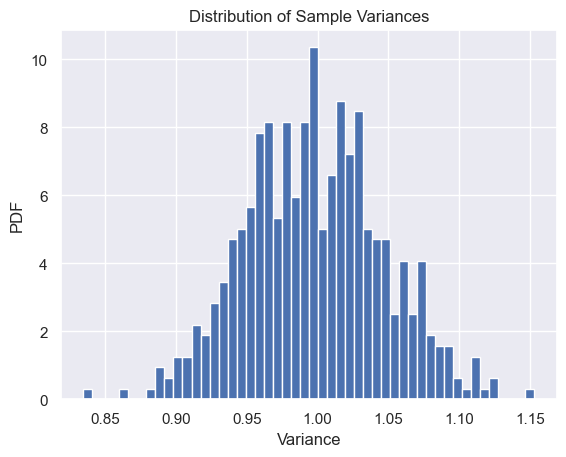

Mean of variances: 0.9974920444387174


In [7]:
ensemble_size = 1000
num_ensembles = 500

variances = []
for _ in range(num_ensembles):
    sample = np.random.normal(0, 1, ensemble_size)
    variances.append(np.var(sample))

plt.figure()
plt.hist(variances, bins=50, density=True)
plt.title("Distribution of Sample Variances")
plt.xlabel("Variance")
plt.ylabel("PDF")
plt.show()

print("Mean of variances:", np.mean(variances))

### Inference
- Variances are not identical for finite samples.
- Distribution is skewed (chi-square nature).
- Increasing ensemble size makes it narrower.

# Final Conclusion
- Gaussian noise has power equal to its variance.
- RMS controls the histogram width.
- Slowly varying signals distort Gaussian statistics.
- Sample variances follow a chi-square distribution and converge to the true value for large N.


